In [441]:
import pandas as pd

In [442]:
df = pd.read_csv('./engineered_dataset.csv')
df.head()

,is_fraud,is_entertainment,category,trans_datetime,amt,amt_month,amt_year,merchant,amt_month_shopping_net_spend,first_time_at_merchant,dist_between_client_and_merch,times_shopped_at_merchant,cc_num,avg_spend_per_visit,spend_ratio
0,0,False,misc_net,2019-01-01 00:00:00,4.97,4.97,4.97,"fraud_Rippin, Kub and Mann",0.00,True,78.773821,5,2703186189652095,0.828333,0.832496
1,0,False,grocery_pos,2019-01-01 00:00:00,159.54,4060.82,4060.82,fraud_Murray-Smitham,117.52,True,35.921066,4,36078114201167,812.164000,0.039278
2,0,True,entertainment,2019-01-01 00:00:00,4.01,2481.52,2481.52,fraud_Beier LLC,6.67,True,75.991336,3,3567527758368741,620.380000,0.001615
3,0,False,grocery_pos,2019-01-01 00:00:00,195.22,2538.29,2538.29,"fraud_Huel, Hammes and Witting",140.19,True,86.277046,1,4026222041577,1269.145000,0.076880
4,0,True,shopping_pos,2019-01-01 00:00:00,268.16,12384.35,12384.35,"fraud_Bins, Balistreri and Beatty",3016.67,True,75.943368,2,341546199006537,4128.116667,0.021651


In [443]:
df.describe(include="all")

,is_fraud,is_entertainment,category,trans_datetime,amt,amt_month,amt_year,merchant,amt_month_shopping_net_spend,first_time_at_merchant,dist_between_client_and_merch,times_shopped_at_merchant,cc_num,avg_spend_per_visit,spend_ratio
count,1.482976e+06,1482976,1482976,1482976,1.482976e+06,1.482976e+06,1.482976e+06,1482976,1.482976e+06,1482976,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06
unique,NaN,2,14,3456,NaN,NaN,NaN,693,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,False,gas_transport,2019-12-06 23:00:00,NaN,NaN,NaN,fraud_Kilback LLC,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,988498,150533,1688,NaN,NaN,NaN,5002,NaN,1056557,NaN,NaN,NaN,NaN,NaN
mean,5.507169e-03,NaN,NaN,NaN,7.018088e+01,4.129771e+03,4.516288e+04,NaN,3.738999e+02,NaN,7.609412e+01,5.297121e+00,4.183012e+17,7.448850e+02,5.710571e-02
std,7.400570e-02,NaN,NaN,NaN,1.598960e+02,3.889190e+03,3.578899e+04,NaN,7.231827e+02,NaN,2.910281e+01,3.093869e+00,1.310377e+18,7.679945e+02,1.424982e-01
min,0.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.020000e+00,NaN,0.000000e+00,NaN,6.673123e-02,1.000000e+00,6.041621e+10,9.454545e-02,3.097998e-05
25%,0.000000e+00,NaN,NaN,NaN,9.660000e+00,1.333560e+03,1.724934e+04,NaN,8.870000e+00,NaN,5.529976e+01,3.000000e+00,1.800400e+14,2.446165e+02,4.045438e-03
50%,0.000000e+00,NaN,NaN,NaN,4.753000e+01,3.055445e+03,3.733289e+04,NaN,7.463000e+01,NaN,7.822345e+01,5.000000e+00,3.521417e+15,5.320910e+02,1.372523e-02
75%,0.000000e+00,NaN,NaN,NaN,8.316000e+01,5.715020e+03,6.455611e+04,NaN,4.213000e+02,NaN,9.846099e+01,7.000000e+00,4.642255e+15,9.851849e+02,4.031536e-02


In [444]:
legitimate = df[(df['is_entertainment']) & (df['is_fraud'] == 0)]
print(f"Transacciones legítimas: {len(legitimate)}")
fraudulent = df[(df['is_entertainment']) & (df['is_fraud'] == 1)]
print(f"Transacciones fraudulentas: {len(fraudulent)}")

Transacciones legítimas: 491070
Transacciones fraudulentas: 3408


In [445]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

for col in df.select_dtypes(include='object').columns:
	df[col] = df[col].astype('category')

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_model = X_train.drop(columns=['is_entertainment'])
X_test_model  = X_test .drop(columns=['is_entertainment'])

train_data = lgb.Dataset(X_train_model, label=y_train)
valid_data = lgb.Dataset(X_test_model, label=y_test)

In [446]:
def feval_ratio_fp(preds, data):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()

	if TP == 0:
		return 'ratio_fp', float('inf'), False

	ratio_fp = (TP + FP) / TP
	return 'ratio_fp', ratio_fp, False

In [447]:
def feval_fp_penalty(preds, data, alpha=2.0):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()
	FN = ((y_true == 1) & (y_pred == 0)).sum()

	if TP == 0:
		return 'fp_penalty_f1', 0.0, True

	prec = TP / (TP + alpha * FP) if (TP + alpha * FP) > 0 else 0
	rec = TP / (TP + FN) if (TP + FN) > 0 else 0

	if prec + rec == 0:
		f1_penalized = 0.0
	else:
		f1_penalized = 2 * prec * rec / (prec + rec)

	return 'fp_penalty_f1', f1_penalized, True

In [448]:
def feval_all(preds, data):
	return [
		feval_ratio_fp(preds, data),
		feval_fp_penalty(preds, data, alpha=2.0)
	]

In [449]:
# Params
params = {
	'min_child_samples': 150,
	'boosting_type': 'gbdt',
	'class_weight': 'balanced',
	'objective': 'binary',
	'learning_rate': 0.01,
	'num_leaves': 25,
	'verbose': -1,
	'metric': 'auc'
}

In [450]:
# Train
model = lgb.train(
	params,
	train_data,
	valid_sets=[valid_data],
	num_boost_round=2000,
	feval = feval_fp_penalty,
	callbacks=[
		lgb.early_stopping(100),
		lgb.log_evaluation(100)
	]
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.990285	valid_0's fp_penalty_f1: 0.594026
[200]	valid_0's auc: 0.99305	valid_0's fp_penalty_f1: 0.726017
[300]	valid_0's auc: 0.994399	valid_0's fp_penalty_f1: 0.746154
[400]	valid_0's auc: 0.995135	valid_0's fp_penalty_f1: 0.756423
[500]	valid_0's auc: 0.995568	valid_0's fp_penalty_f1: 0.760135
[600]	valid_0's auc: 0.995765	valid_0's fp_penalty_f1: 0.759946
[700]	valid_0's auc: 0.995884	valid_0's fp_penalty_f1: 0.766273
[800]	valid_0's auc: 0.995915	valid_0's fp_penalty_f1: 0.769697
[900]	valid_0's auc: 0.995969	valid_0's fp_penalty_f1: 0.769386
Early stopping, best iteration is:
[872]	valid_0's auc: 0.995948	valid_0's fp_penalty_f1: 0.77032


In [ ]:
# Predict and evaluate
y_pred_proba = model.predict(X_test_model)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print(f"\nAUC: {roc_auc_score(y_test, y_pred_proba) * 100:.4f}%")


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294963
           1       0.92      0.70      0.80      1633

    accuracy                           1.00    296596
   macro avg       0.96      0.85      0.90    296596
weighted avg       1.00      1.00      1.00    296596


--- Confusion Matrix ---
[[294868     95]
 [   491   1142]]

AUC: 84.9502%


In [457]:
fp_mask = (y_test == 0) & (y_pred == 1)
fp_count_entertainment = fp_mask[X_test['is_entertainment'] == True].sum()
fp_total = fp_mask.sum()

print(f"\nFalse Positives (Entertainment): {fp_count_entertainment}")
print(f"Total False Positives: {fp_total}")


False Positives (Entertainment): 76
Total False Positives: 95


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

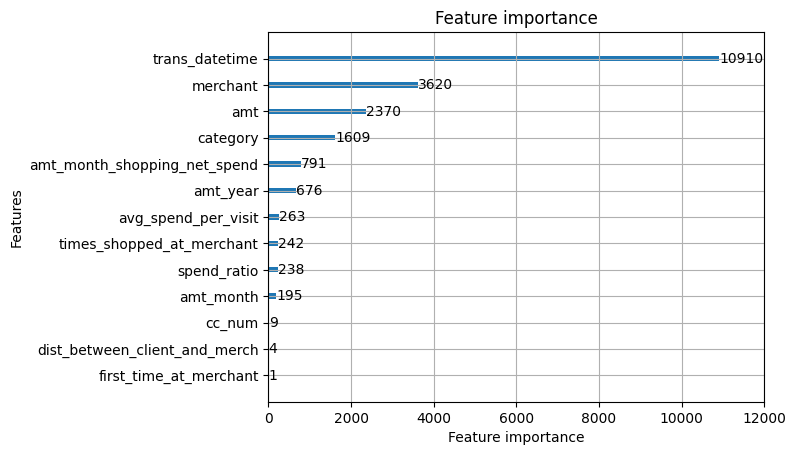

In [458]:
lgb.plot_importance(model, max_num_features=20)